## Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import os

# Reading Dataset

In [4]:
data=pd.read_csv('/content/drive/MyDrive/TWITTER SENTIMENT ANALYSIS/CoronaTweetsSentimentAnalysis.csv')

In [5]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive
...,...,...,...,...,...,...
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
1986,1987,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive


In [6]:
#obtaining a numeric representation of an array

data['res'] = pd.factorize(data.Sentiment)[0]

In [7]:
print(data['res'])

0       0
1       1
2       0
3       0
4       0
       ..
1983    0
1984    0
1985    1
1986    0
1987    1
Name: res, Length: 1988, dtype: int64


In [8]:
#seeing top 40 rows

data.head(40)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,res
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,0
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,0
5,6,44971,NaN,05-03-2020,That's about a week from now. A bit optimistic...,Positive,0
6,7,44973,Malta,05-03-2020,#CoronaVirus #COVID_19 People are starting to ...,Negative,1
7,8,44978,"Wayne County, MI",07-03-2020,Alright yall I hope our Melanin prevails but ...,Positive,0
8,9,44979,"Bondi Beach, Sydney",07-03-2020,When your usual grocery shopping @woolworths t...,Negative,1
9,10,44980,NaN,07-03-2020,Coronavirus panic spreads: Costco is pulling f...,Negative,1


In [9]:
#check dimensions of the dataset

data.shape

(1988, 7)

In [10]:
#used for calculating check statistical data

data['res'].describe()

count    1988.000000
mean        0.523642
std         0.499566
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: res, dtype: float64

In [11]:
#checking data types of the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       1988 non-null   int64 
 1   ScreenName     1988 non-null   int64 
 2   Location       1536 non-null   object
 3   TweetAt        1988 non-null   object
 4   OriginalTweet  1988 non-null   object
 5   Sentiment      1988 non-null   object
 6   res            1988 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 108.8+ KB


In [12]:
data.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
res               int64
dtype: object

In [13]:
#checking unique values of the feature
data.nunique()

UserName         1988
ScreenName       1988
Location         1019
TweetAt            14
OriginalTweet    1988
Sentiment           2
res                 2
dtype: int64

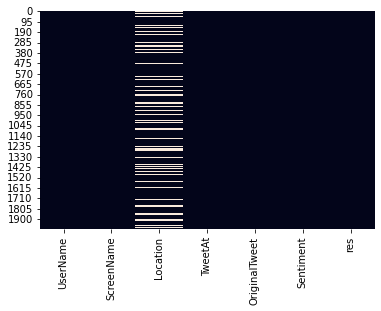

In [14]:
#heatmap of null values

data.isnull().sum()
sns.heatmap(data.isnull(),cbar=False)

In [15]:
#checking the missing values by boolean 


data_missing =data.isna()
data_missing.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,res
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [16]:
#checking missing data in features
data_missing.sum()

UserName           0
ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
res                0
dtype: int64

percentage for default

Negative    52.36
Positive    47.64
Name: Sentiment, dtype: float64


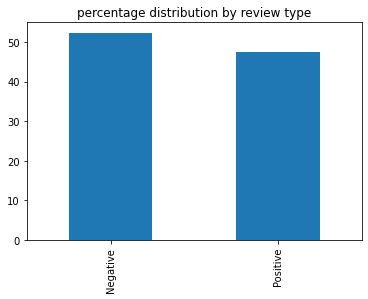

In [17]:
#percentage distribution by review 

import matplotlib.pyplot as plt
%matplotlib inline 
print('percentage for default\n')
print(round(data.Sentiment.value_counts(normalize=True)*100,2))
round(data.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('percentage distribution by review type')
plt.show()

Text(0.5, 1.0, 'distribution of sentiiment')

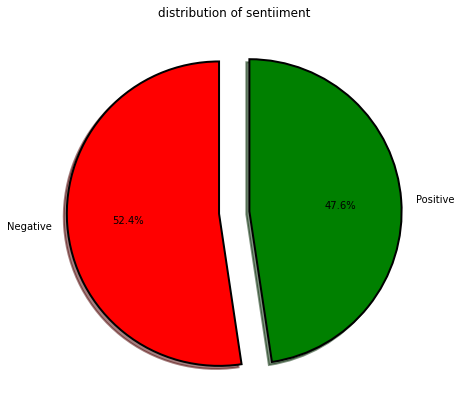

In [18]:
#pie chart distribution of sentiment

fig=plt.figure(figsize=(7,7))
colors=("red",'green')
wp={'linewidth':2,'edgecolor':"black"}
tags=data['Sentiment'].value_counts()
explode=(0.1,0.1)
tags.plot(kind='pie',autopct="%1.1f%%",shadow=True,colors=colors,
          startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("distribution of sentiiment")

In [19]:
#checking information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       1988 non-null   int64 
 1   ScreenName     1988 non-null   int64 
 2   Location       1536 non-null   object
 3   TweetAt        1988 non-null   object
 4   OriginalTweet  1988 non-null   object
 5   Sentiment      1988 non-null   object
 6   res            1988 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 108.8+ KB


In [21]:
# Droping the unwanted features

data.drop(['TweetAt','ScreenName','UserName','Location'],axis=1,inplace=True)

In [22]:
#checking the dataset after droping unwanted features
data.head()

,OriginalTweet,Sentiment,res
0,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,Best quality couches at unbelievably low price...,Positive,0
4,While we were busy watching election returns a...,Positive,0


# DATA PREPROCESSING

In [23]:
#import preprocessing libraries like nltk

from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
corpus = []
for i in range(0,1988):
    OriginalTweet = re.sub('[^a-zA-Z]'," ",data["OriginalTweet"][i])
    OriginalTweet = OriginalTweet.lower()
    OriginalTweet = OriginalTweet.split()
    pe=PorterStemmer()
    all_stopword=stopwords.words('english')
    type (all_stopword)
    all_stopword.remove("not")
    OriginalTweet = [pe.stem(word) for word in OriginalTweet if not word in set (all_stopword)]
    OriginalTweet=" ".join(OriginalTweet)
    corpus.append(OriginalTweet)

In [26]:
corpus

['find hand sanit fred meyer turn amazon pack purel check coronaviru concern drive price http co ygbipbflmi',
 'panic buy hit newyork citi anxiou shopper stock food amp medic suppli healthcar worker becom bigappl st confirm coronaviru patient bloomberg stage event http co iasiregpc qanon qanon qanon elect cdc http co iszoewxu',
 'vote age coronaviru hand sanit supertuesday http co z bel dk',
 'best qualiti couch unbeliev low price avail order boksburg gp info whatsapp supertuesdsi powertalk covid sayentrepreneur djsbu http co hhdjhyq dc',
 'busi watch elect return brace covid outbreak trump nomin chemic industri lobbyist head consum product safeti commiss http co shhi tn',
 'week bit optimist probabl take anoth month suppli chain may recov demand chain non exist us europ next month two spx qqq es nq http co yxcofl bni',
 'coronaviru covid peopl start becom frighten panicshop mani shelv meanwhil turn empti good sold facemask amp disinfect liquid sold sold exorbit price blockchain crypto

In [27]:
corpus = [str (item) for item in corpus]

In [28]:
len(corpus)

1988

In [29]:
#see the most used word in the dataset


from wordcloud import WordCloud

<function matplotlib.pyplot.show>

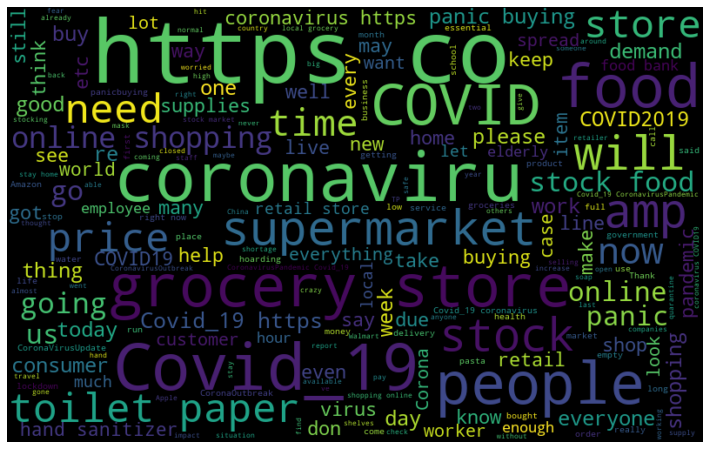

In [30]:
all_words=" ".join([sentence for sentence in data['OriginalTweet']])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

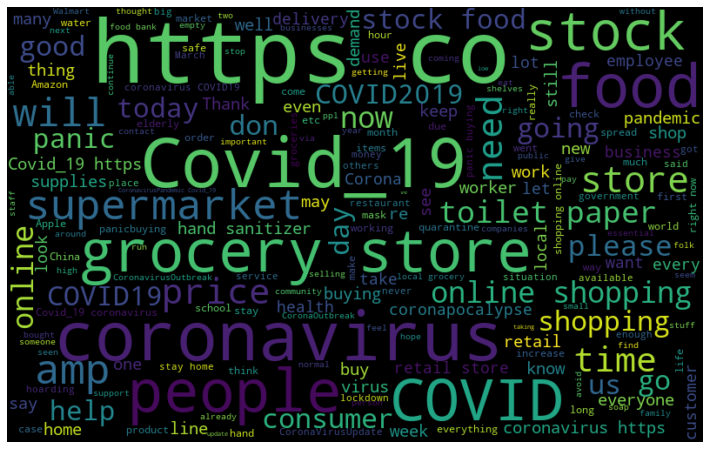

In [31]:
#most used postive words in dataset

all_words_positive=" ".join([sentence for sentence in data['OriginalTweet'][data['res']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words_positive)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

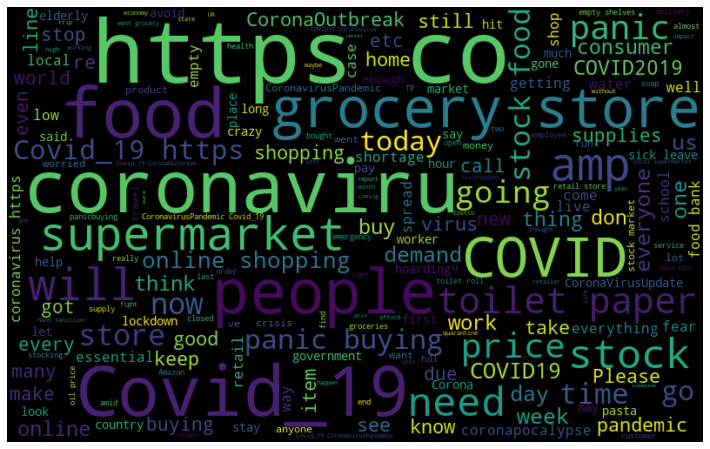

In [32]:
# most used negative words in dataset

all_words_negative=" ".join([sentence for sentence in data['OriginalTweet'][data['res']==1]])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words_negative)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

In [35]:
#Checking the Positive and Negative Hashtag in dataset

def hashtag_extract(OriginalTweet):
    hashtags=[]
    for word in OriginalTweet:
        ht=re.findall(r"#(\w+)",word)
        hashtags.append(ht)
    return hashtags

In [36]:
ht_positive=hashtag_extract(data['OriginalTweet'][data['res']==0])
ht_negative=hashtag_extract(data['OriginalTweet'][data['res']==1])

In [37]:
ht_positive[:5]

[['Amazon', 'coronavirus'],
 ['coronavirus', 'SuperTuesday'],
 ['SuperTuesdsy', 'PowerTalk', 'Covid_19', 'SayEntrepreneur', 'DJSBU'],
 [],
 []]

In [38]:
ht_negative[:5]

[['Panic',
  'NewYork',
  'healthcare',
  'BigApple',
  'coronavirus',
  'Bloomberg',
  'QAnon',
  'QAnon2018',
  'QAnon2020',
  'Election2020',
  'CDC'],
 ['CoronaVirus',
  'COVID_19',
  'PanicShopping',
  'goods',
  'FaceMasks',
  'Blockchain',
  'CryptoNews'],
 ['toiletpaperpanic', 'coronavirus'],
 [],
 ['covid19', 'coronavirus']]

In [39]:
#using tfidf vectorizer- used to convert a collection of text documents to a vector of term

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tcv = TfidfVectorizer(max_features=5000)
X = tcv.fit_transform(corpus).toarray()
y= data['res']

In [41]:
len(X)

1988

In [42]:
len(y)

1988

# TRAINING AND TEST DATA SPLIT

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape , y_test.shape

((1590, 5000), (398,))

# MODEL BUILDING

In [44]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
classifier = GaussianNB().fit(X_train,y_train)
cls = MultinomialNB().fit(X_train,y_train)

In [45]:
#TRAINING SCORE OF GaussianNB
cls.score(X_train,y_train)

0.9345911949685535

In [46]:
# Training score of MultinomialNB
cls.score(X_test,y_test)

0.6130653266331658

In [47]:
# Test score of GaussianNB
classifier.score(X_test,y_test)

0.5201005025125628

In [50]:
#Test score of MultinomialNB
cls.score(X_test,y_test)

0.6130653266331658

In [51]:
y_pred = cls.predict(X_test)
type(y_test)

pandas.core.series.Series

In [52]:
#Evaluation metrics

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
score= accuracy_score(y_test,y_pred)
print(cm,score*100)

[[ 86  92]
 [ 62 158]] 61.30653266331658


In [53]:
from sklearn.linear_model import LogisticRegression

In [50]:
model=LogisticRegression(solver="lbfgs",penalty='l2')

In [51]:
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
model.score(X_train,y_train)

0.9182389937106918

In [53]:
model.score(X_test,y_test)

0.6055276381909548

In [54]:
y_logpred = cls.predict(X_test)
type(y_test)

pandas.core.series.Series

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_logpred)
score= accuracy_score(y_test,y_logpred)
print(cm,score*100)

[[ 86  92]
 [ 62 158]] 61.30653266331658


In [54]:
#used for serializing and de-serializing python object structures.
import pickle
pickle.dump(cls,open("Description.pkl","wb"))

In [55]:
loaded_model = pickle.load(open("Description.pkl","rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.6130653266331658

In [56]:
from keras.models import Sequential

In [61]:
from keras.layers import Dense, Dropout, Activation,  Embedding, Flatten

In [57]:
from tensorflow.keras import optimizers

# LSTM Network

In [62]:
from keras.layers import LSTM

In [63]:
model_lstm = Sequential()
model_lstm.add(Embedding(1590,128,input_length=(5000)))
model_lstm.add(LSTM(128,return_sequences=True))
model_lstm.add(LSTM(64))
model_lstm.add(Flatten())
model_lstm.add(Dense(60, activation = 'tanh'))
model_lstm.add(Dense(1, activation = 'sigmoid'))

In [64]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 128)         203520    
                                                                 
 lstm (LSTM)                 (None, 5000, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 60)                3900      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 388,473
Trainable params: 388,473
Non-tr

In [65]:
sgd=optimizers.SGD(learning_rate=0.1, momentum = 0.9, decay = 1e-2/30)
model_lstm.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [66]:
history_1=model_lstm.fit(X_train,y_train,epochs=30,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/30
10/10 [==============================] - 15s 658ms/step - loss: 0.6956 - accuracy: 0.5157 - val_loss: 0.6945 - val_accuracy: 0.4874
Epoch 2/30
10/10 [==============================] - 6s 560ms/step - loss: 0.6959 - accuracy: 0.5189 - val_loss: 0.7063 - val_accuracy: 0.5126
Epoch 3/30
10/10 [==============================] - 6s 577ms/step - loss: 0.7000 - accuracy: 0.4921 - val_loss: 0.6956 - val_accuracy: 0.4874
Epoch 4/30
10/10 [==============================] - 6s 569ms/step - loss: 0.6966 - accuracy: 0.5110 - val_loss: 0.6928 - val_accuracy: 0.5126
Epoch 5/30
10/10 [==============================] - 6s 567ms/step - loss: 0.6939 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.5126
Epoch 6/30
10/10 [==============================] - 6s 573ms/step - loss: 0.6953 - accuracy: 0.5173 - val_loss: 0.6929 - val_accuracy: 0.5126
Epoch 7/30
10/10 [==============================] - 6s 575ms/step - loss: 0.6945 - accuracy: 0.4843 - val_loss: 0.6929 - val_accuracy: 0.5126
Epoch

In [67]:
score = model_lstm.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])

13/13 [==============================] - 2s 141ms/step - loss: 0.6899 - accuracy: 0.5528
Test Score: 0.689923107624054
Test Accuracy: 0.552763819694519


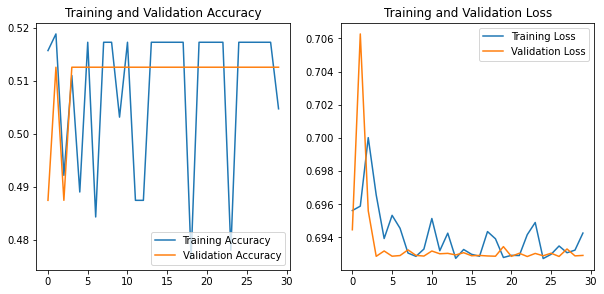

In [68]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# CHECKING FOR NEW TWEET

In [69]:
def new_Description(new_Description):
    new_Description =new_Description
    new_Description  = re.sub('[^a-zA-Z]'," ",new_Description)
    new_Description = new_Description.lower()
    new_Description = new_Description.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    new_Description= [ps.stem(word) for word in new_Description if not word in set (all_stopwords)]
    new_Description=' '.join(new_Description)
    new_corpus=[new_Description]
    new_X_test = tcv.transform(new_corpus).toarray()
    print(new_X_test.shape)
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred
    
new_Description = new_Description( str ( input ("Enter new review:")))
if new_Description[0]==0:
  print("positive")
else:
  print("negative")

Enter new review:corona is a Disaster to the world
(1, 5000)
negative
